<a href="https://colab.research.google.com/github/ilham-mukti/Machine-Learning/blob/main/clustering/Latihan_Clustering_Ngasal_COBA_COBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

import plotly.express as px
import plotly.graph_objects as go

In [61]:
datas = pd.read_csv("https://raw.githubusercontent.com/ilham-mukti/Machine-Learning/main/clustering/dataset/Mall_Customers.csv")
datas.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
X = datas[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
model = KMeans(n_clusters=5, init='k-means++', n_init=50, random_state=42)
cluster = model.fit_predict(X)
center = model.cluster_centers_
analisis_cluster = pd.DataFrame(center, columns=X.columns)
analisis_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,40.666667,87.750000,17.583333
1,43.088608,55.291139,49.569620
2,25.521739,26.304348,78.565217
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


In [4]:
df = datas.copy()
df['label'] = cluster
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


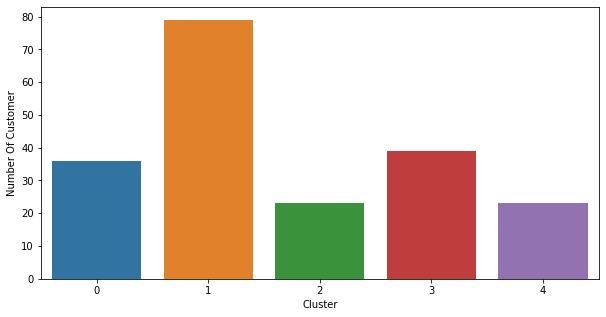

In [5]:
label = df.label.value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=label.index, y=label.values)
plt.xlabel("Cluster")
plt.ylabel("Number Of Customer");

In [6]:
figure = px.scatter_3d(df,
                    color='label',
                    x="Age",
                    y="Annual Income (k$)",
                    z="Spending Score (1-100)",            
                    category_orders = {"label": ["0", "1", "2", "3", "4"]}                    
                    )
figure.update_layout()
figure.show()

In [7]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
X_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [74]:
model = KMeans(n_clusters=5, init='k-means++', n_init=50, random_state=42)
cluster = model.fit_predict(X_scaled)
center = model.cluster_centers_
analisis_cluster = pd.DataFrame(center, columns=X.columns)
analisis_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.722149,0.274449,0.416080
1,0.174254,0.303111,0.408580
2,0.286058,0.582787,0.821684
3,0.500000,0.615847,0.172789
4,0.144649,0.092659,0.791482


In [69]:
df = datas.copy()
df['label'] = cluster
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


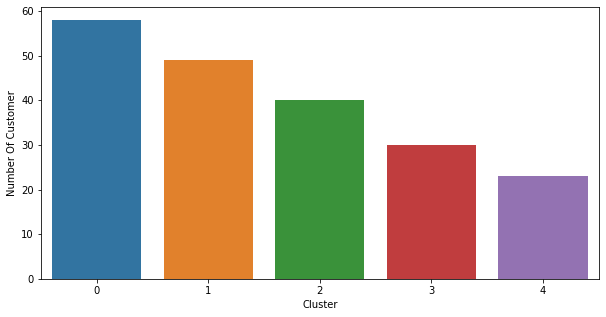

In [70]:
label = df.label.value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=label.index, y=label.values)
plt.xlabel("Cluster")
plt.ylabel("Number Of Customer");

In [71]:
figure = px.scatter_3d(df,
                    color='label',
                    x="Age",
                    y="Annual Income (k$)",
                    z="Spending Score (1-100)",            
                    category_orders = {"label": ["0", "1", "2", "3", "4"]}                    
                    )
figure.update_layout()
figure.show()

In [72]:
df.label.value_counts()

0    58
1    49
2    40
3    30
4    23
Name: label, dtype: int64

In [48]:
datas = pd.read_csv("https://raw.githubusercontent.com/ilham-mukti/Machine-Learning/main/clustering/dataset/Mall_Customers.csv")
X = datas[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [58]:
ahc = AgglomerativeClustering(n_clusters=5, linkage='ward')
member = ahc.fit_predict(X)
member

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [59]:
df = datas.copy()
df['label'] = member
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [98]:
member, umur, pemasukan, pengeluaran = [], [], [], []
for i in range(0, 5):
  rata_rata = df[df.label == i]
  income = rata_rata['Annual Income (k$)'].mean()
  spending = rata_rata['Spending Score (1-100)'].mean()
  age = rata_rata['Age'].mean()
  member.append(i)
  umur.append(age)
  pemasukan.append(income)
  pengeluaran.append(spending)

data_scal = pd.DataFrame([umur, pemasukan, pengeluaran], columns=member, index=['umur', 'income', 'spending'])
data_scal.head()

,0,1,2,3,4
umur,55.551724,27.061224,32.875,44.000000,25.521739
income,48.482759,51.979592,86.100,90.133333,26.304348
spending,41.775862,41.040816,81.525,17.933333,78.565217


In [99]:
umur

[55.55172413793103, 27.06122448979592, 32.875, 44.0, 25.52173913043478]

In [60]:
figure = px.scatter_3d(df,
                    color='label',
                    x="Age",
                    y="Annual Income (k$)",
                    z="Spending Score (1-100)",            
                    category_orders = {"label": ["0", "1", "2", "3", "4"]}                    
                    )
figure.update_layout()
figure.show()

In [49]:
ahc = AgglomerativeClustering(n_clusters=3, linkage='single')
member = ahc.fit_predict(X)